In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from scipy.integrate import odeint
from numpy import linalg as LA

mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 20

%matplotlib inline

# Better looking figures
%config InlineBackend.figure_format = 'retina'

# Make cells narrower for better typography
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:65% !important; }</style>"))

# Phase space structure

In [3]:
def constants(m1, m2, m3, a_i, a_o, e_i, e_o):
    a_o = a_o/a_i
    m12 = m1 + m2
    m1 = m1/m12
    m2 = m2/m12
    m3 = m3/m12

    # mass factors
    mu_i = m1*m2
    
    # Poincaré momenta
    Lambda_i = mu_i*1.
    Lambda_o = m3*np.sqrt(a_o)
    Gamma_i = Lambda_i*(1 - np.sqrt(1 - e_i**2))
    Gamma_o = Lambda_o*(1 - np.sqrt(1 - e_o**2))
        
    # Constants
    T3 = Gamma_i - Gamma_o/4 
    alpha = 54*m3**3/Lambda_o**4 + 3*mu_i**3/(2*Lambda_i**4)
    beta =  3*m3**3/Lambda_o**3 - .5*mu_i**3/(2*Lambda_i**3)
    
    eps = (np.sqrt(T3)/alpha)*(4797*np.sqrt(2)/16)*Lambda_i**(7/2)*m3**7\
        /(Lambda_o**8*mu_i**3)
    
    return mu_i, m3, Lambda_o, Lambda_i, Gamma_o, Gamma_i, alpha, beta, eps
    
def hamiltonian(x, y, delta, alpha, beta, eps):      
    # Calculate Hamiltonian
    Phi = (x**2 + y**2)/2.
    cosphi = x/np.sqrt(x**2 + y**2)
    cos4phi = 8*(cosphi**4 - cosphi**2) + 1
    
    return Phi**2 + delta*Phi - eps*Phi**2*cos4phi
    
    
# Initial conditions
m1 = 1. # in solar masses
m2 = .7
m12 = m1 + m2
m3 = .3*9.5458e-04
m123 = m1 + m2 + m3
P_i = 41/365 # in years
a_i = (P_i**2*m12)**(1/3.) # in au
P_o = 6*P_i
a_o = (P_o**2*m123)**(1/3.)
e_i = .4
e_o = .2

# Calculate constant for use in the Hamiltonian
mu_i, m3, Lambda_o, Lambda_i, Gamma_o,\
Gamma_i, alpha, beta, eps = constants(m1, m2, m3, a_i, a_o, e_i, e_o)

print("value of H for above parameters", (Gamma_o/4)**2\
      +(4*beta/alpha)*(Gamma_o/4) - eps*(Gamma_o/4)**2*np.cos(4*np.random.rand()*2*np.pi))

print("mu_i: ", mu_i)
print("m3: ", m3)
print("Lambda_i: ", Lambda_i)
print("Lambda_o: ", Lambda_o)
print("epsilon: ", eps)
print("delta: ", 4*beta/alpha)

value of H for above parameters 5.48714800213e-11
mu_i:  0.2422145328719723
m3:  0.00016845529411764707
Lambda_i:  0.2422145328719723
Lambda_o:  0.000306112177438
epsilon:  0.0503829028739
delta:  3.40024368068e-05


Fixed points:

 phi =  [ 0.          0.78539816  1.57079633  2.35619449  3.14159265  3.92699082
  4.71238898  5.49778714] 

 Phi =  [ 0.00235228  0.00213554  0.00235228  0.00213554  0.00235228  0.00213554
  0.00235228  0.00213554] 

[  1.80726796e+00   4.72061733e-11]
[  2.19273204e+00  -3.20680663e-11]
[  1.80726796e+00   4.72061733e-11]
[  2.19273204e+00  -3.20680663e-11]
[  1.80726796e+00   4.72061733e-11]
[  2.19273204e+00  -3.20680663e-11]
[  1.80726796e+00   4.72061733e-11]
[  2.19273204e+00  -3.20680663e-11]
value of H at fixed pts:
[  4.97647722e-06   4.97864462e-06   4.97647722e-06   4.97864462e-06
   4.97647722e-06   4.97864462e-06   4.97647722e-06   4.97864462e-06]


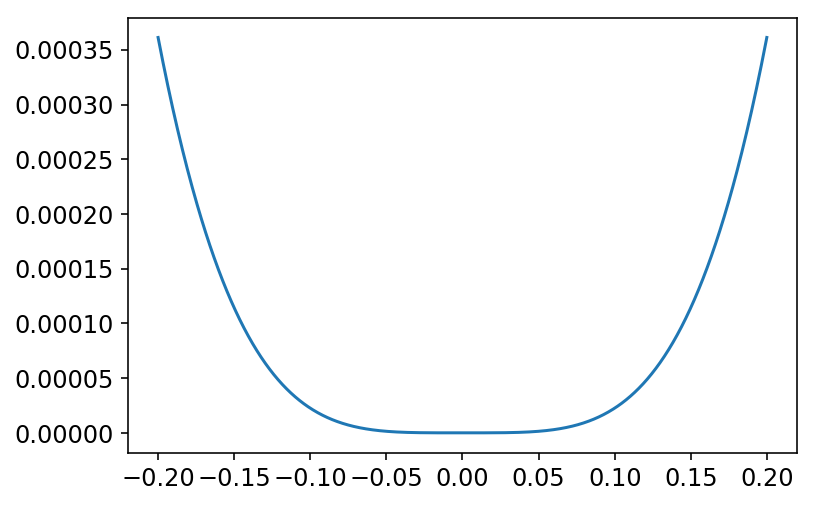

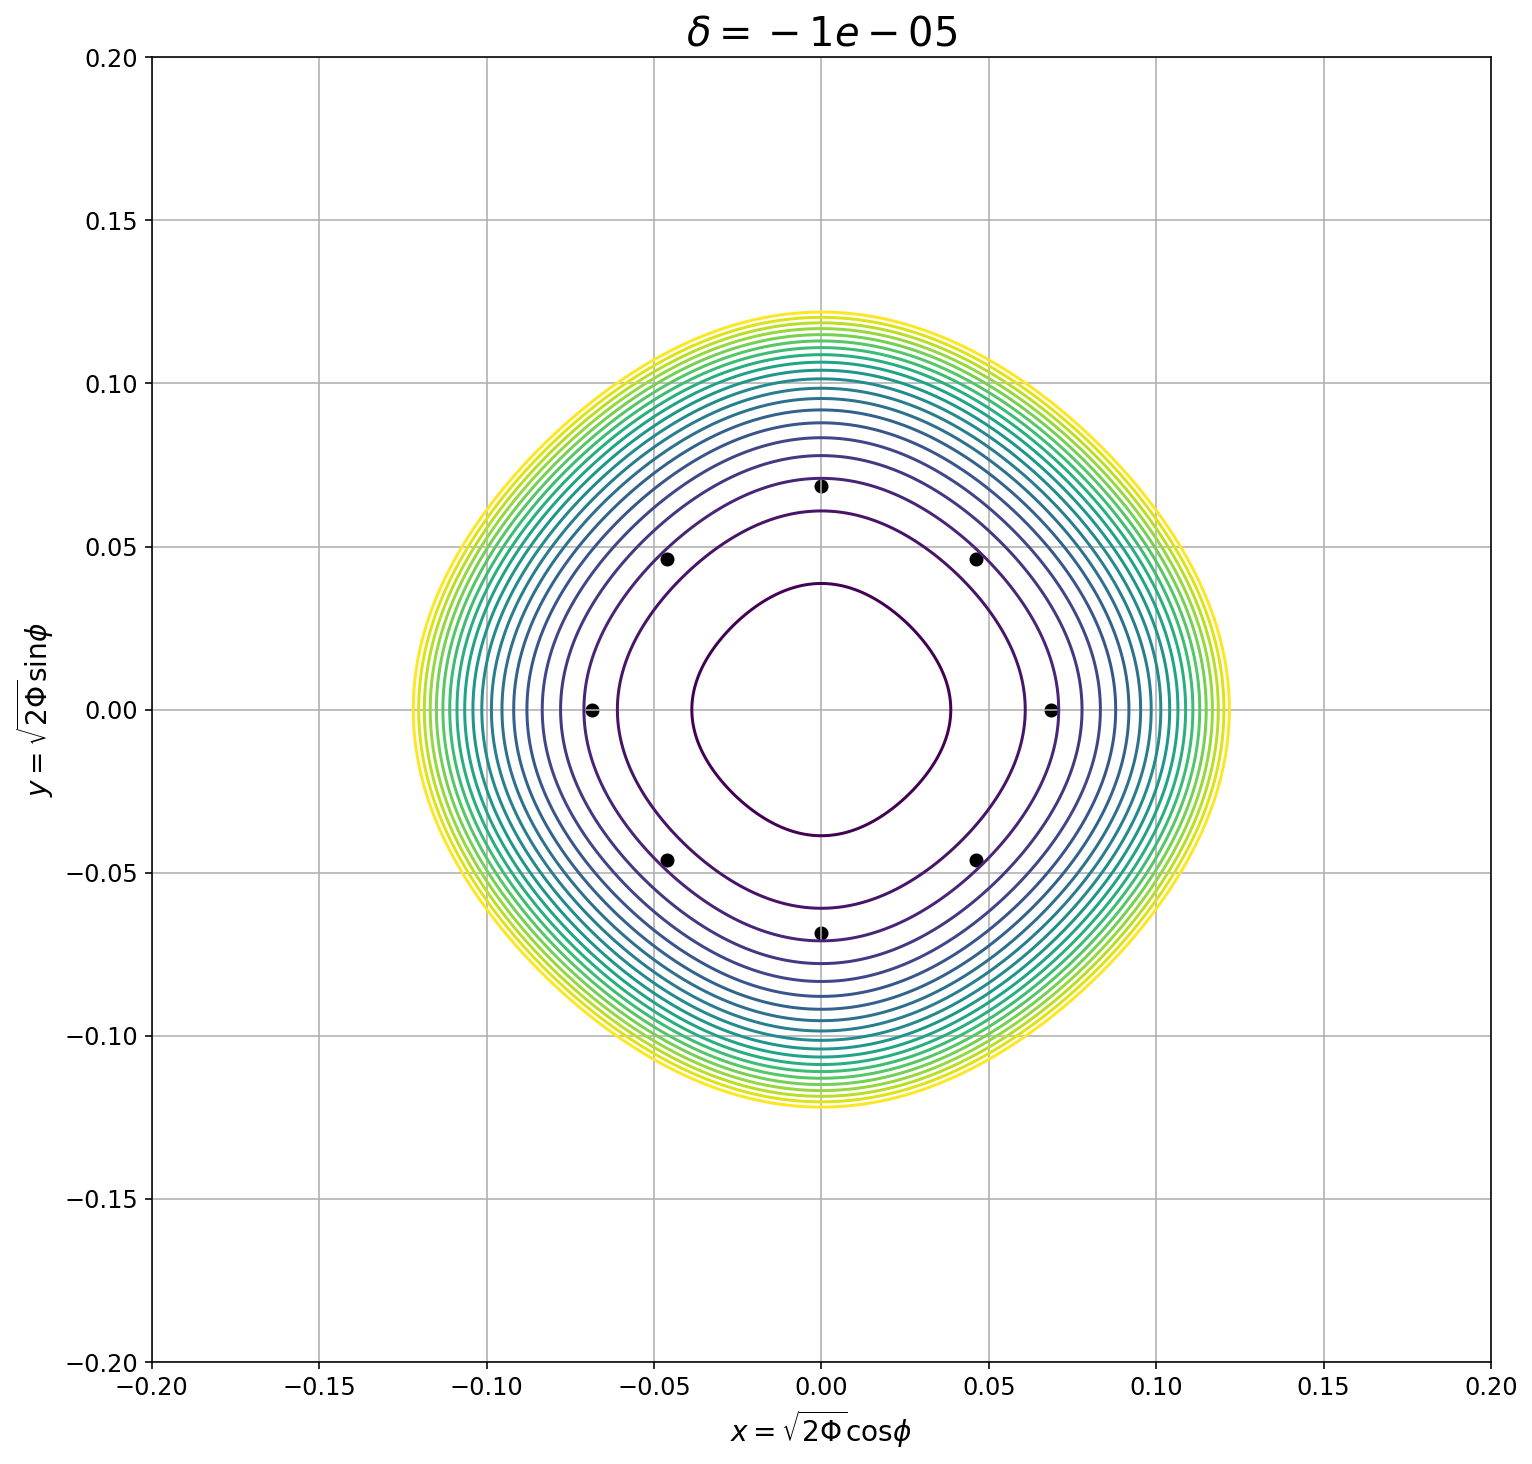

In [4]:
# Vary delta parameter (distance to resonance)
delta = -1e-05

# Calculate positions and stability of fixed points
phi = np.pi*np.arange(0, 8)/4

fixed_points = np.sqrt(-(delta/2)/(1 + eps*np.cos(4*phi)))

print("Fixed points:\n")
print(" phi = ", phi, "\n")
print(" Phi = ", fixed_points, "\n")

# Value of Hamiltonian at fixed points
print("value of H at fixed pts:")
H_fixed = fixed_points**2 + delta*fixed_points + eps*fixed_points**2*np.cos(4*phi)
print(H_fixed)

# Define (x,y) grid
l = .2
x = np.linspace(-l, l, 1000)
y = np.linspace(-l, l, 1000)

X, Y = np.meshgrid(x, y)

Z = hamiltonian(X, Y, delta, alpha, beta, eps)
plt.plot(X[500, :], Z[500,:])

fig, ax = plt.subplots(figsize=(12,12))

# Contour values
a = np.linspace(.1*H_fixed[0], 10*H_fixed[0], 20)

CS = ax.contour(X, Y, Z, levels=a)

# Transform fixed points to (x,y) plane
x_fix = np.sqrt(2*fixed_points)*np.cos(phi)
y_fix = np.sqrt(2*fixed_points)*np.sin(phi)

ax.scatter(x_fix, y_fix, color='black')
ax.grid(True)
ax.set_xlabel(r'$x=\sqrt{2\Phi}\cos{\phi}$')
ax.set_ylabel(r'$y=\sqrt{2\Phi}\sin{\phi}$')
ax.set_title(r"$\delta = {0}$".format(delta))

plt.savefig("4.pdf")

# Time evolution of Hamiltonian

Initial Theta:  2.62850681933e-06
Initial theta:  3.191281652397418
Initial delta:  -0.0001
(20000, 3)


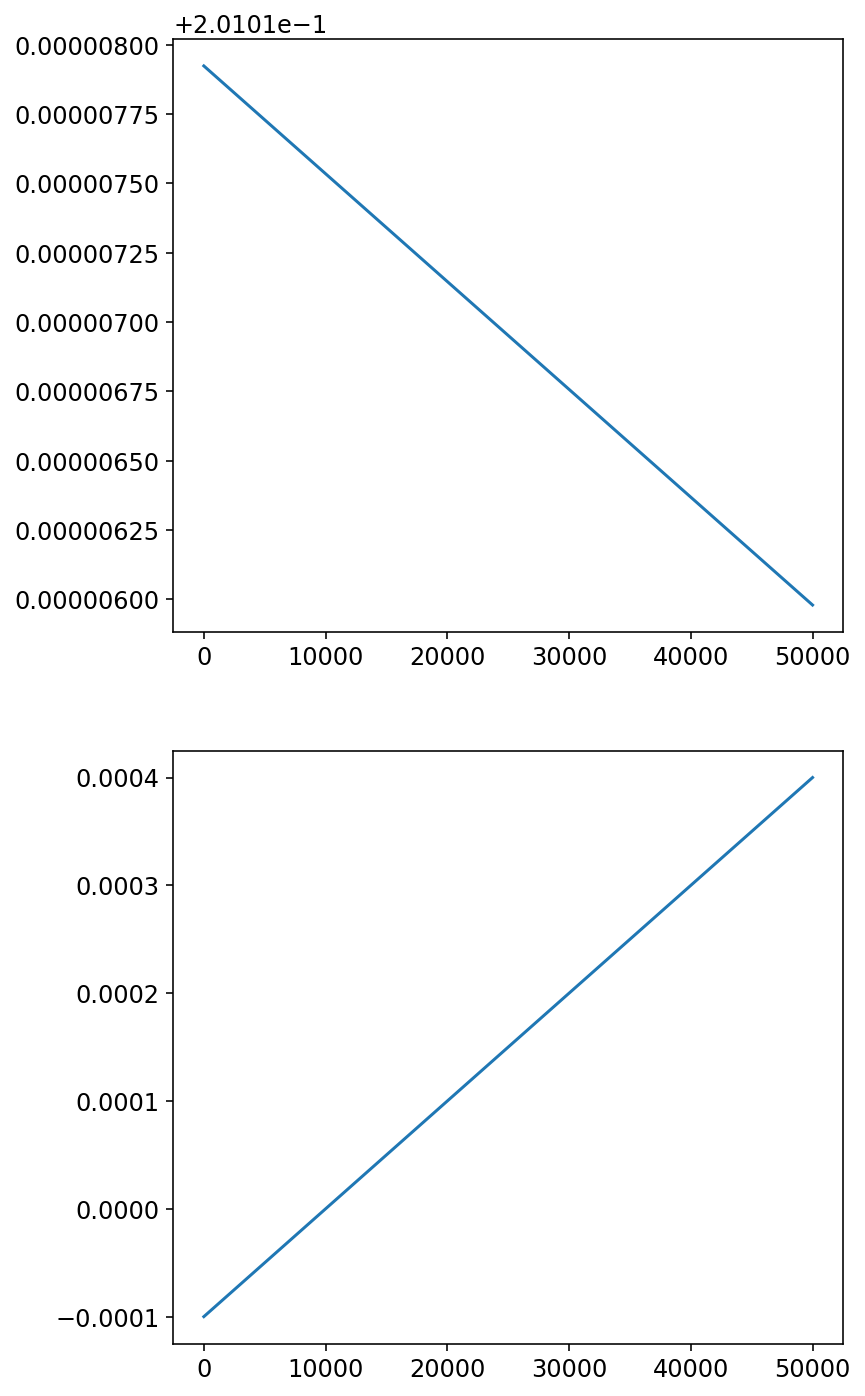

In [5]:
def time_evolution(var, t, params):
    """
    Defines the differential equations for the time evolution of the 
    resonant Hamiltonian
    
    Arguments:
        var :  vector of the state variables:
                  var = [Phi, phi, delta]
        t :  time
        params :  vector of the parameters:
                  params = [eps, delta_dot, alpha]
    """
    Theta, theta, delta = var # updated each timestep
    
    eps, delta_dot, alpha = params
    
    # Calculate derivatives    
    f = np.array([
        eps*Phi**2*np.sin(4*phi)*(16/alpha),
        2*Phi + delta + 2*eps*Phi*np.cos(4*phi)*(16/alpha),
        delta_dot
    ])
    
    return f

# Parameter values:
m1 = 1.
m2 = .7
m12 = m1 + m2
m3 = .3*9.5458e-04
m123 = m1 + m2 + m3
P_i = 41/365 # years
a_i = (P_i**2*m12)**(1/3.)
P_o = 6.*P_i
a_o = (P_o**2*m123)**(1/3.)
e_i = .4
e_o = .2

a_o = a_o/a_i
m12 = m1 + m2
m1 = m1/m12
m2 = m2/m12
mu_o = m3/m12

# mass factors
mu_o = m3
mu_i = m1*m2

# Poincaré momenta
Lambda_i = m1*m2
Lambda_o = m3*np.sqrt(a_o)
Gamma_i = Lambda_i*(1 - np.sqrt(1 - e_i**2))
Gamma_o = Lambda_o*(1 - np.sqrt(1 - e_o**2))

# Constants
T3 = Gamma_i - Gamma_o/4 
alpha = 54*mu_o**3/Lambda_o**4 + 3*mu_i**3/(2*Lambda_i**4)
beta =  3*mu_o**3/Lambda_o**3 - .5*mu_i**3/(2*Lambda_i**3)

eps = -(np.sqrt(T3)/alpha)*4797*np.sqrt(2)*Lambda_i**(7/2)*mu_o**7/(Lambda_o**8*mu_i**3)

delta_dot = 1e-8

# Initial conditions 
Phi = Gamma_o/4
phi = np.random.rand()*2*np.pi
delta = -1e-04

print("Initial Theta: ", Phi)
print("Initial theta: ", phi)
print("Initial delta: ", delta)

# ODE solver parameters
# abserr = 1.0e-8
# relerr = 1.0e-6

# Time grid
t = np.linspace(0, 5e04, 20000)

params = np.array([eps, delta_dot, alpha])
var = np.array([Phi, phi, delta])

# Call the ODE solver.
sol = odeint(time_evolution, var, t, args=(params,), full_output=0)
print(np.shape(sol))

ecc = np.sqrt(8*sol[:, 0]/(mu_o*np.sqrt(a_o)))
d = sol[:, 2]

fig, ax = plt.subplots(2, figsize=(6,12))
ax[0].plot(t, ecc)
ax[1].plot(t, d)